In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
path='day.csv'
bike_df = pd.read_csv(path)
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
bike_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [4]:
#Rename the columns
bike_df.rename(columns={'instant':'rec_id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'demand'},inplace=True)

In [5]:
bike_df.head()

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
#Type casting the datetime and numerical attributes to category

bike_df['datetime']=pd.to_datetime(bike_df.datetime)

bike_df['season']=bike_df.season.astype('category')
bike_df['year']=bike_df.year.astype('category')
bike_df['month']=bike_df.month.astype('category')
bike_df['holiday']=bike_df.holiday.astype('category')
bike_df['weekday']=bike_df.weekday.astype('category')
bike_df['workingday']=bike_df.workingday.astype('category')
bike_df['weather_condition']=bike_df.weather_condition.astype('category')

In [7]:
#Summary of the dataset
bike_df.describe()

,rec_id,temp,atemp,humidity,windspeed,casual,registered,demand
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
#Missing values in dataset
bike_df.isnull().sum()

rec_id               0
datetime             0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
demand               0
dtype: int64

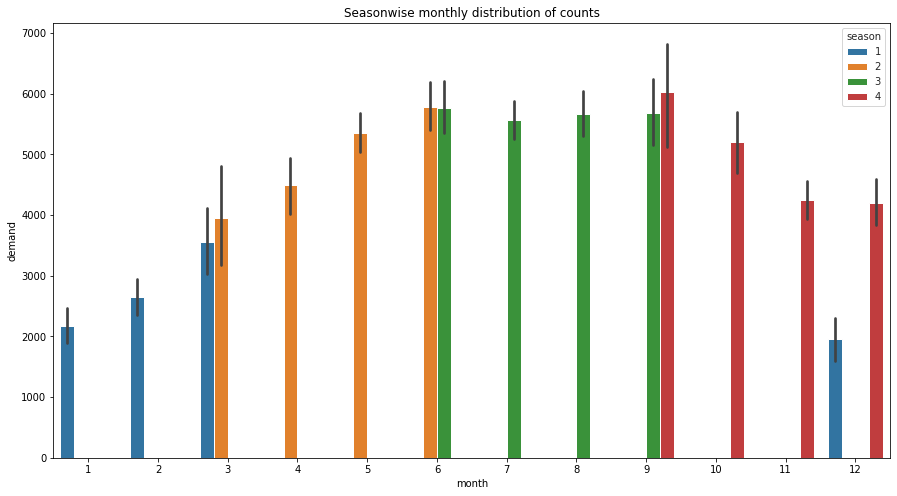

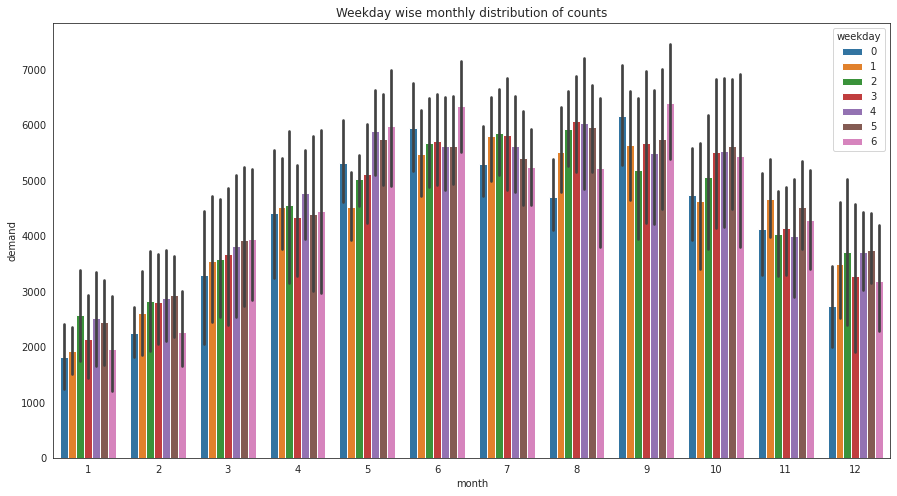

In [9]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month',y='demand',data=bike_df[['month','demand','season']],hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()
#Bar plot for weekday wise monthly distribution of counts
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='month',y='demand',data=bike_df[['month','demand','weekday']],hue='weekday',ax=ax1)
ax1.set_title('Weekday wise monthly distribution of counts')
plt.show()

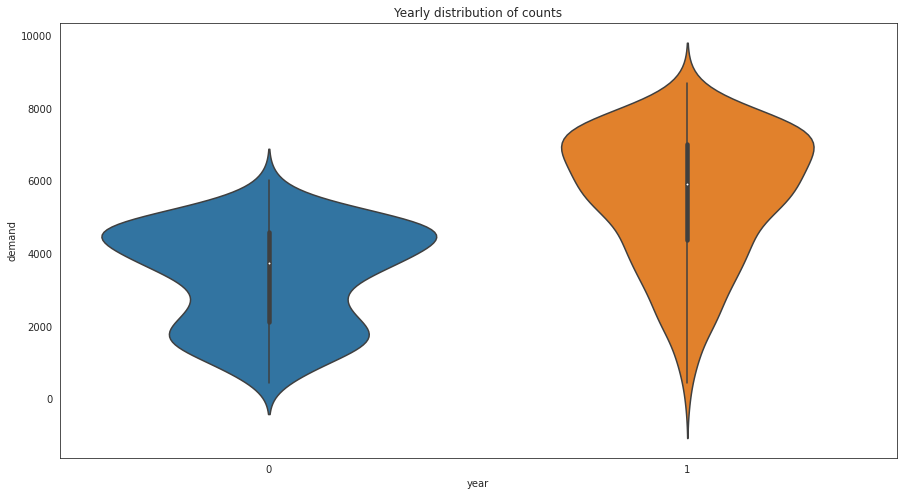

In [10]:
fig,ax=plt.subplots(figsize=(15,8))
#Violin plot for yearly distribution of counts
sns.violinplot(x='year',y='demand',data=bike_df[['year','demand']])
ax.set_title('Yearly distribution of counts')
plt.show()

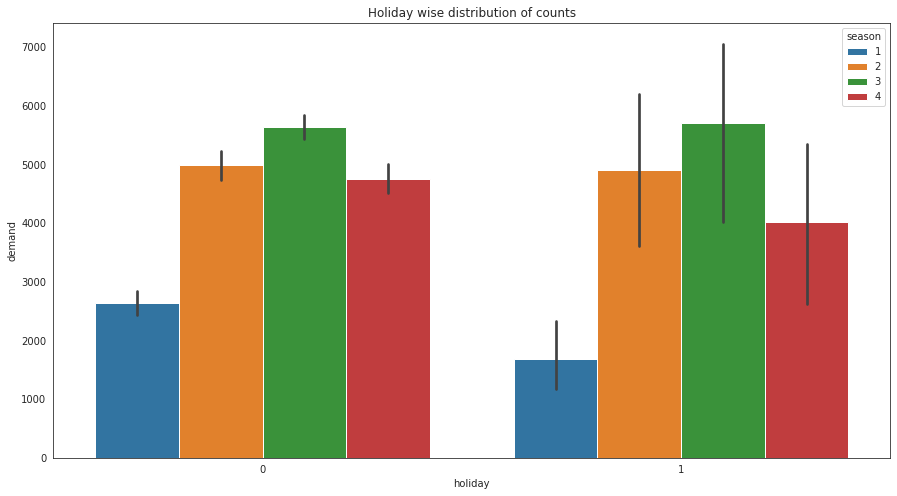

In [11]:
fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday distribution of counts
sns.barplot(data=bike_df,x='holiday',y='demand',hue='season')
ax.set_title('Holiday wise distribution of counts')
plt.show()

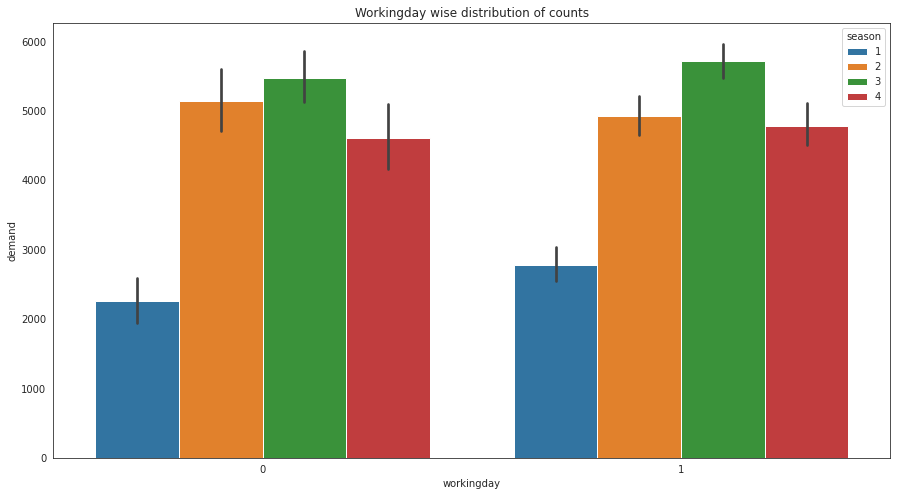

In [12]:
fig,ax=plt.subplots(figsize=(15,8))
#Bar plot for workingday distribution of counts
sns.barplot(data=bike_df,x='workingday',y='demand',hue='season')
ax.set_title('Workingday wise distribution of counts')
plt.show()

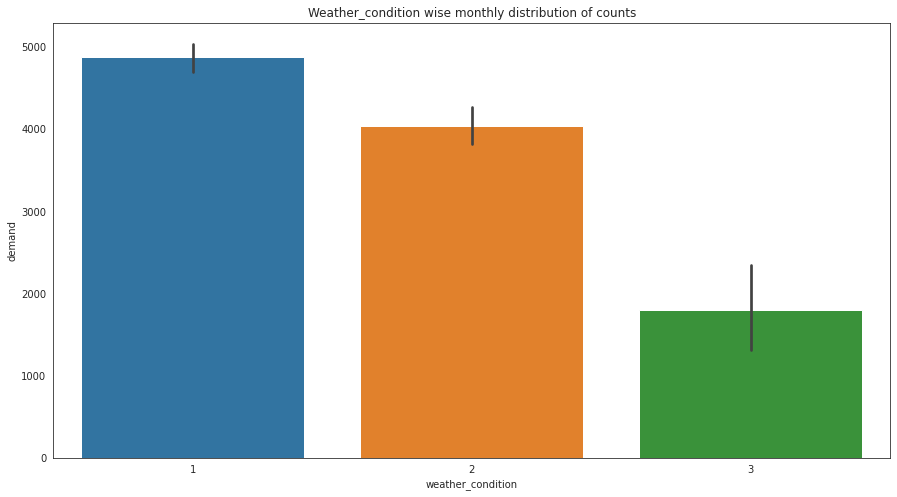

In [13]:
fig,ax1=plt.subplots(figsize=(15,8))
#Bar plot for weather_condition distribution of counts
sns.barplot(x='weather_condition',y='demand',data=bike_df[['month','demand','weather_condition']],ax=ax1)
ax1.set_title('Weather_condition wise monthly distribution of counts')
plt.show()

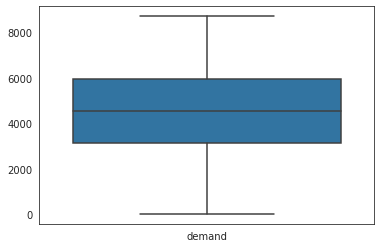

In [14]:
#Boxplot for total_count outliers
sns.boxplot(data=bike_df[['demand']])
ax.set_title('total_count outliers')
plt.show()

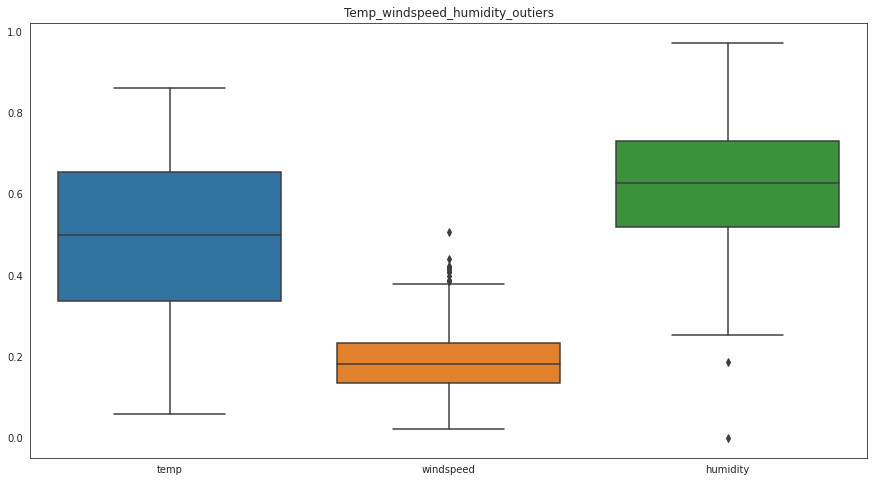

In [15]:
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for Temp_windspeed_humidity_outliers
sns.boxplot(data=bike_df[['temp','windspeed','humidity']])
ax.set_title('Temp_windspeed_humidity_outiers')
plt.show()

In [16]:
#removing outliers from windspeed and humidity
#create dataframe for outliers
wind_hum=pd.DataFrame(bike_df,columns=['windspeed','humidity'])
 #Cnames for outliers                     
cnames=['windspeed','humidity']       
                      
for i in cnames:
    q75,q25=np.percentile(wind_hum.loc[:,i],[75,25]) # Divide data into 75%quantile and 25%quantile.
    iqr=q75-q25 #Inter quantile range
    min=q25-(iqr*1.5) #inner fence
    max=q75+(iqr*1.5) #outer fence
    wind_hum.loc[wind_hum.loc[:,i]<min,:i]=np.nan  #Replace with NA
    wind_hum.loc[wind_hum.loc[:,i]>max,:i]=np.nan  #Replace with NA
#Imputating the outliers by mean Imputation
wind_hum['windspeed']=wind_hum['windspeed'].fillna(wind_hum['windspeed'].mean())
wind_hum['humidity']=wind_hum['humidity'].fillna(wind_hum['humidity'].mean())
#Replacing the imputated windspeed
bike_df['windspeed']=bike_df['windspeed'].replace(wind_hum['windspeed'])
#Replacing the imputated humidity
bike_df['humidity']=bike_df['humidity'].replace(wind_hum['humidity'])
bike_df.head(5)

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


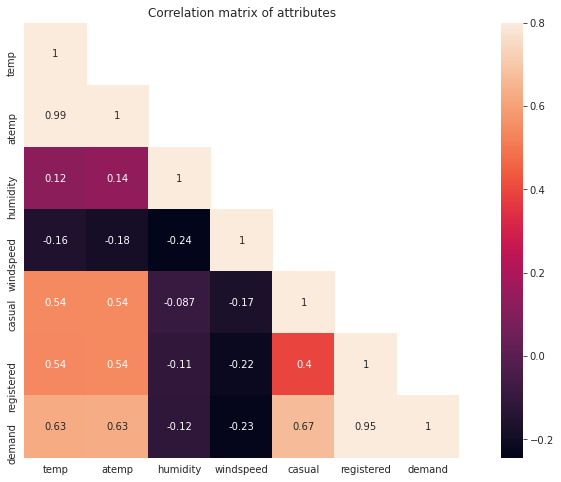

In [17]:
#Create the correlation matrix
correMtr=bike_df[["temp","atemp","humidity","windspeed","casual","registered","demand"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

In [18]:
#since casual, registered are highly positvely correlated and temp and atemp are same so remove
bike_df = bike_df.copy()
bike_df = bike_df.drop(['rec_id', 'datetime', 'casual', 'registered','atemp'], axis=1)
bike_df.head()

,season,year,month,holiday,weekday,workingday,weather_condition,temp,humidity,windspeed,demand
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [19]:
#Split the dataset into the train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(bike_df.iloc[:,0:-1],bike_df.iloc[:,-1],test_size=0.3, random_state=42)

#Reset train index values
X_train.reset_index(inplace=True)
y_train=y_train.reset_index()

# Reset train index values
X_test.reset_index(inplace=True)
y_test=y_test.reset_index()

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
print(y_train.head())
print(y_test.head())

(511, 11) (220, 11) (511, 2) (220, 2)
   index  demand
0    223    4905
1    684    5445
2    685    5698
3    163    5020
4    394    3624
   index  demand
0    703    6606
1     33    1550
2    300    3747
3    456    6041
4    633    7538


In [20]:
#Create a new dataset for train attributes
train_attributes=X_train[['season','month','year','weekday','holiday','workingday','weather_condition','humidity','temp','windspeed']]
#Create a new dataset for test attributes
test_attributes=X_test[['season','month','year','weekday','holiday','workingday','humidity','temp','windspeed','weather_condition']]
#categorical attributes
cat_attributes=['season','holiday','workingday','weather_condition','year']
#numerical attributes
num_attributes=['temp','windspeed','humidity','month','weekday']

In [21]:
#To get dummy variables to encode the categorical features to numeric
train_encoded_attributes=pd.get_dummies(train_attributes,columns=cat_attributes)
print('Shape of transfomed dataframe::',train_encoded_attributes.shape)
train_encoded_attributes.head(5)

Shape of transfomed dataframe:: (511, 18)


,month,weekday,humidity,temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0,year_1
0,8,5,0.415000,0.708333,0.125621,0,0,1,0,1,0,0,1,1,0,0,1,0
1,11,4,0.620417,0.321667,0.152987,0,0,0,1,1,0,0,1,0,1,0,0,1
2,11,5,0.524583,0.345000,0.171025,0,0,0,1,1,0,0,1,1,0,0,0,1
3,6,1,0.494583,0.635000,0.305350,0,1,0,0,1,0,0,1,1,0,0,1,0
4,1,1,0.400833,0.269167,0.215792,1,0,0,0,1,0,0,1,1,0,0,0,1


In [22]:
#Training dataset for modelling
X_train=train_encoded_attributes
y_train=y_train.demand.values

In [23]:
#linear model
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

In [24]:
#training model
lr_model=linear_model.LinearRegression()
lr_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
#fit the trained model
lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
#Accuracy of the model
lr=lr_model.score(X_train,y_train)
print('Accuracy of the model :',lr)
print('Model coefficients :',lr_model.coef_)
print('Model intercept value :',lr_model.intercept_)

Accuracy of the model : 0.8165025087335218
Model coefficients : [  -25.40093273    69.00041734 -1021.83801516  5265.83269167
 -2556.15204574  -949.34444399   229.82675107   -79.72789531
   799.24558823   228.48467064  -228.48467064   -78.95445063
    78.95445063   761.85445399   252.23446226 -1014.08891625
  -989.30080604   989.30080604]
Model intercept value : 2195.310562348839


In [27]:
#Cross validation prediction
predict=cross_val_predict(lr_model,X_train,y_train,cv=3)
predict

array([ 5248.7578435 ,  5038.5615668 ,  5806.79339316,  4353.94868702,
        3738.02165465,  6781.13199665,  6258.53686563,  3802.32154757,
        4679.69060739,  3413.26938345,  5382.26926795,  3103.26413427,
        4340.14502978,  5792.02135524,  4357.90482085,  6307.47067538,
        4382.53420011,  3356.51602988,   722.55880035,   542.99629923,
        7419.07107033,  3747.2639444 ,  5282.38323084,  5494.01243603,
        6941.05375802,  7322.95928003,  3629.5886932 ,  3571.12912785,
         985.45343201,  4884.05952005,  1644.73801661,  1708.88196943,
        1689.90104258,  1295.63879625,  4891.47726849,  5507.81236621,
        6015.17425095,  4180.63057735,  5075.38404498,  5941.56769703,
        6400.40498745,  4215.81855312,  5962.38814912,  6052.71452714,
        3345.73314148,  4096.72004817,  1465.44713372,  3603.17274178,
        4587.89942466,  6650.65699064,  1719.93360965,  6128.15135134,
        6439.33525805,  3277.84008997,  4592.0786174 ,  3194.61235   ,
      

In [30]:
#R-squared scores
r2_scores = cross_val_score(lr_model, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.7995611885231044


In [31]:
#To get dummy variables to encode the categorical features to numeric
test_encoded_attributes=pd.get_dummies(test_attributes,columns=cat_attributes)
print('Shape of transformed dataframe :',test_encoded_attributes.shape)
test_encoded_attributes.head(5)

Shape of transformed dataframe : (220, 18)


,month,weekday,humidity,temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0,year_1
0,12,2,0.733750,0.475833,0.174129,0,0,0,1,1,0,0,1,1,0,0,0,1
1,2,4,0.437826,0.186957,0.277752,1,0,0,0,1,0,0,1,1,0,0,1,0
2,10,5,0.585833,0.330833,0.229479,0,0,0,1,1,0,0,1,0,1,0,1,0
3,4,0,0.676250,0.425833,0.172267,0,1,0,0,1,0,1,0,0,1,0,0,1
4,9,2,0.570000,0.550000,0.236321,0,0,0,1,1,0,0,1,1,0,0,0,1


In [32]:
#Test dataset for prediction
X_test=test_encoded_attributes
y_test=y_test.demand.values

In [40]:
#predict the model
lr_pred=lr_model.predict(X_test)
lr_pred

array([6197.12329782, 1378.27938018, 3212.82326914, 4825.6058012 ,
       6672.2308762 , 6942.2039349 ,  693.99373527, 1929.80808599,
       6981.48110092, 6844.67173725, 2798.54559266, 2121.8457389 ,
       4465.68268321, 5486.74428544, 2189.59008463, 1827.67433934,
       2173.48158771, 7469.58027211, 5500.15015098, 2608.49336522,
       6933.20124884, 7837.10306473, 5532.48547104, 1261.13929139,
       1245.46616862, 4479.83361908, 2496.61989036, 6733.37234742,
       3854.86011528, 5802.97615092, 3103.90712661, 4252.34563973,
       6358.26561572, 6798.3144729 , 5790.26253638, 5402.54802544,
       6692.75313381, 5848.44121572, 3180.98457936,  805.80292438,
       4497.72178336, 3746.59014984, 6903.03554988, 4077.94155535,
       6907.0442079 , 1687.7942605 , 4801.49297945, 4723.9530173 ,
       6369.39948476, 4579.39869385, 3105.76669461, 2833.81705416,
       1829.36260472, 5601.65932265, 4625.78263028, 4089.39223053,
       4695.03945324, 3038.41700558, 4351.67190815, 6630.97204

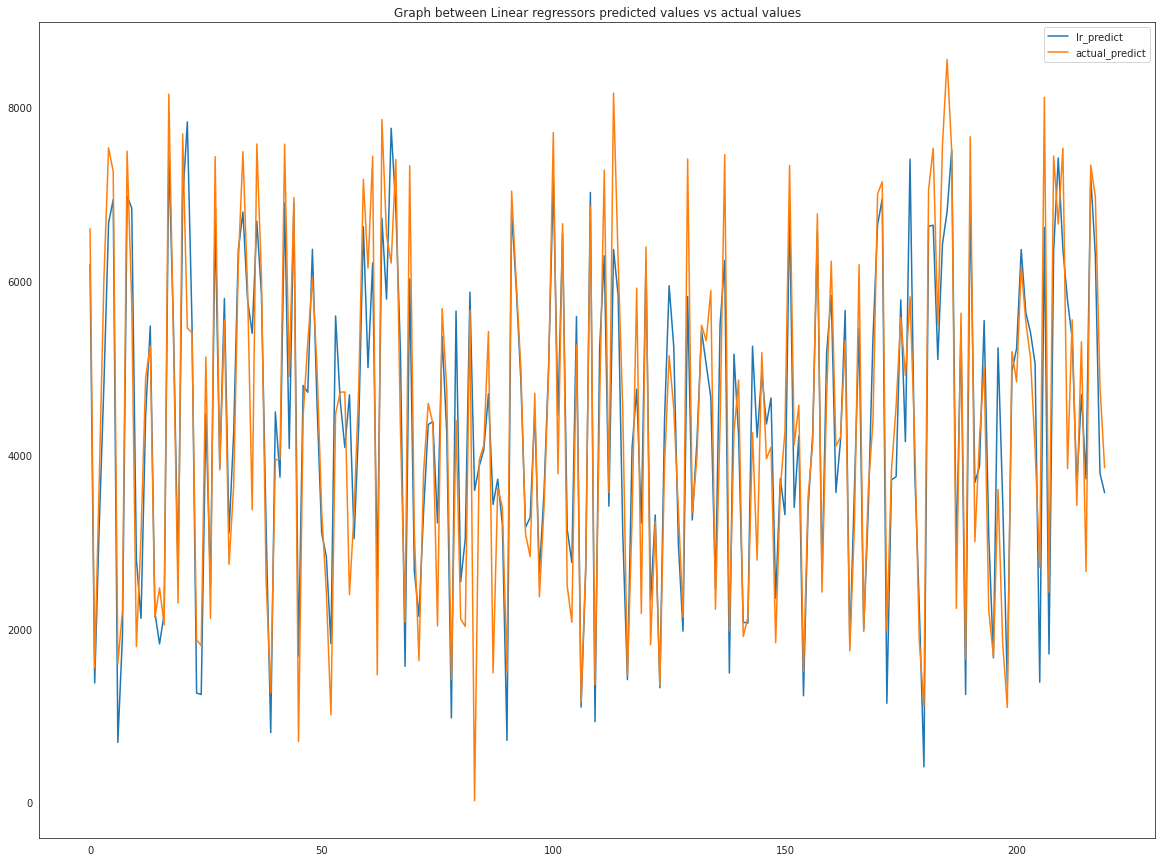

In [68]:
fig,ax=plt.subplots(figsize=(20,15))
ax.set_title('Graph between Linear regressors predicted values vs actual values')
ax.plot(lr_pred, label='lr_predict')
ax.plot(y_test, label='actual_predict')
ax.legend()

In [45]:
import math
#Root mean square error 
rmse=math.sqrt(metrics.mean_squared_error(y_test,lr_pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,lr_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 783.0616972625064
Mean absolute error : 594.7368430236429


In [46]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=10)

In [47]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=10,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [48]:
#Accuracy score of the model
dtr_score=dtr.score(X_train,y_train)
print('Accuracy of model :',dtr_score)

Accuracy of model : 0.8082151777539757


In [49]:
predict=cross_val_predict(dtr,X_train,y_train,cv=3)
predict

array([4513.38554217, 4592.56521739, 4592.56521739, 4513.38554217,
       2558.6       , 5388.47058824, 6824.96969697, 4592.56521739,
       4592.56521739, 3603.92857143, 6824.96969697, 3194.22222222,
       4513.38554217, 6824.96969697, 4513.38554217, 6824.96969697,
       3603.92857143, 1636.81818182, 1636.81818182, 1636.81818182,
       6824.96969697, 2558.6       , 4592.56521739, 1027.        ,
       6824.96969697, 6824.96969697, 2558.6       , 4592.56521739,
       1636.81818182, 4513.38554217, 1636.81818182, 1636.81818182,
       1636.81818182, 1636.81818182, 4513.38554217, 5388.47058824,
       6824.96969697, 4592.56521739, 4513.38554217, 6824.96969697,
       6824.96969697, 4513.38554217, 6824.96969697, 6824.96969697,
       4513.38554217, 3194.22222222, 1636.81818182, 4592.56521739,
       4513.38554217, 6824.96969697, 3194.22222222, 6824.96969697,
       6824.96969697, 3603.92857143, 4513.38554217, 1027.        ,
       1636.81818182, 4513.38554217, 1636.81818182, 4513.38554

In [50]:
#R-squared scores
r2_scores = cross_val_score(dtr, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))                 

R-squared scores : 0.7460808156442775


In [51]:
#predict the model
dtr_pred=dtr.predict(X_test)
dtr_pred

array([6777.95      , 1848.95454545, 3612.69230769, 5277.09375   ,
       6777.95      , 6777.95      , 1848.95454545, 1992.25      ,
       6777.95      , 6777.95      , 1848.95454545, 1992.25      ,
       4465.04444444, 5277.09375   , 1992.25      , 1992.25      ,
       1992.25      , 6777.95      , 4465.04444444, 1848.95454545,
       6777.95      , 6777.95      , 5277.09375   , 1848.95454545,
       1992.25      , 4465.04444444, 1992.25      , 6777.95      ,
       1848.95454545, 5277.09375   , 1848.95454545, 4465.04444444,
       6777.95      , 6777.95      , 6777.95      , 5484.22727273,
       6777.95      , 6777.95      , 4465.04444444, 1848.95454545,
       4465.04444444, 1848.95454545, 6777.95      , 4465.04444444,
       6777.95      , 3612.69230769, 4465.04444444, 6777.95      ,
       6777.95      , 5484.22727273, 4465.04444444, 1848.95454545,
       1992.25      , 4465.04444444, 4465.04444444, 4465.04444444,
       3170.41666667, 4465.04444444, 4465.04444444, 6777.95   

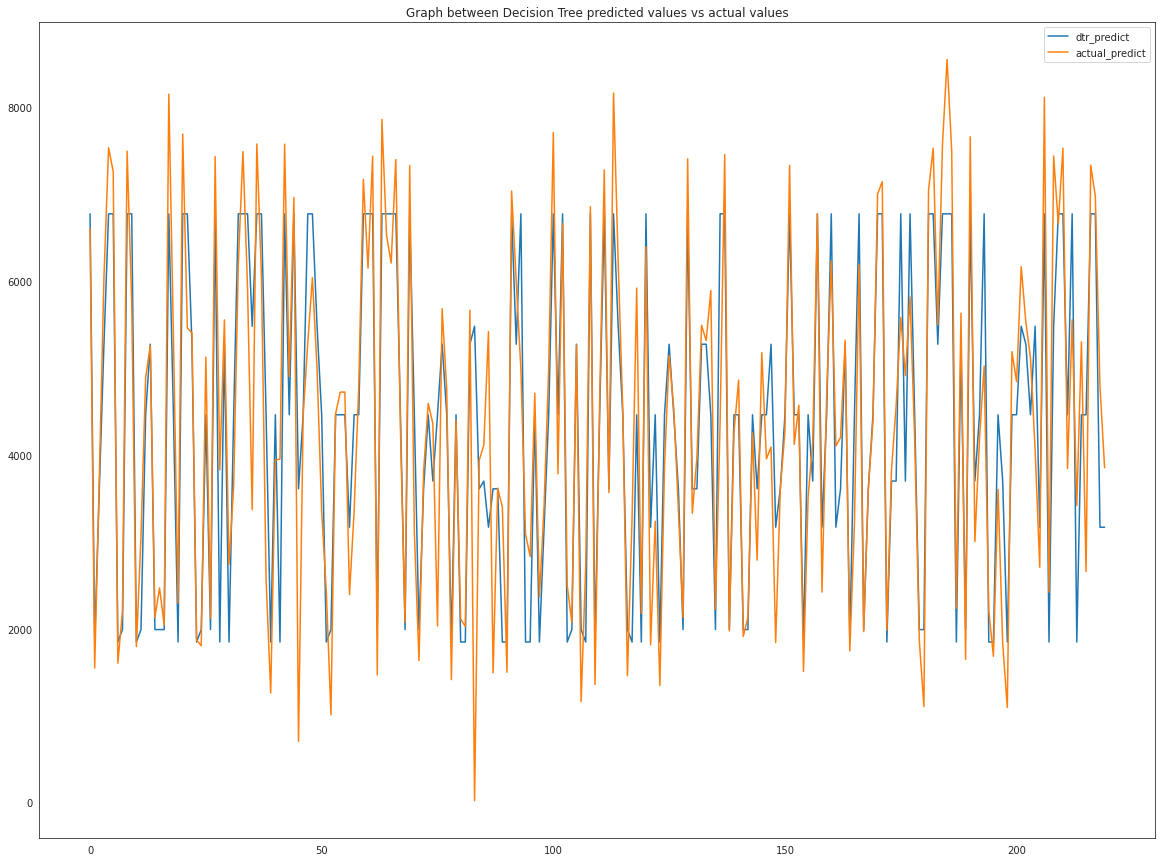

In [70]:
fig,ax=plt.subplots(figsize=(20,15))
ax.set_title('Graph between Decision Tree predicted values vs actual values')
ax.plot(dtr_pred, label='dtr_predict')
ax.plot(y_test, label='actual_predict')
ax.legend()

In [52]:
#Root mean square error
rmse=math.sqrt(metrics.mean_squared_error(y_test,dtr_pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,dtr_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 925.7976022448886
Mean absolute error : 667.8169018859927


In [53]:
#random forest
#Training the model
from sklearn.ensemble import RandomForestRegressor
X_train=train_encoded_attributes
rf=RandomForestRegressor(n_estimators=200)

In [54]:
#Fit the trained model
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [55]:
#accuracy of the model
rf_score =rf.score(X_train,y_train)
print('Accuracy of the model :',rf_score)

Accuracy of the model : 0.9814120931764544


In [56]:
#Cross validation prediction
predict=cross_val_predict(rf,X_train,y_train,cv=3)
predict

array([4974.335, 4741.14 , 5351.455, 4797.37 , 2991.575, 5592.38 ,
       6595.17 , 3817.255, 4244.97 , 3665.295, 5916.395, 3424.82 ,
       4289.8  , 6918.92 , 4884.235, 6726.955, 4179.935, 2564.05 ,
       1135.005, 1356.205, 6223.7  , 3425.925, 4756.805, 4387.615,
       7100.925, 6305.695, 3268.625, 4174.8  , 1393.905, 5047.355,
       1026.79 , 1861.805, 1491.46 , 1940.23 , 4678.75 , 4919.955,
       6718.405, 3949.795, 4316.715, 6021.77 , 6638.585, 4373.475,
       7043.565, 6425.45 , 4457.595, 3483.96 , 1344.97 , 4106.04 ,
       4693.85 , 6534.49 , 2884.945, 6415.28 , 6489.23 , 3377.75 ,
       4914.76 , 3240.27 , 1361.43 , 4063.815, 1043.06 , 4603.37 ,
       5380.615, 3850.975, 3662.34 , 5481.775, 4514.62 , 6965.57 ,
       4613.35 , 3240.905, 3747.01 , 4163.73 , 3593.225, 4461.39 ,
       7066.18 , 3750.93 , 5024.68 , 2380.135, 2523.2  , 4583.6  ,
       2101.915, 4290.425, 4387.085, 4720.8  , 4252.65 , 2071.735,
       7507.165, 4327.74 , 4685.985, 7384.54 , 4642.275, 4209.

In [57]:
#R-squared scores
r2_scores = cross_val_score(rf, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.8499392592663203


In [58]:
X_test=test_encoded_attributes
rf_pred=rf.predict(X_test)
rf_pred

array([6579.94 , 1549.525, 3441.745, 5295.035, 7492.38 , 7203.31 ,
       1473.195, 2229.9  , 7366.865, 6372.725, 2059.335, 2946.095,
       4978.275, 5000.925, 2067.95 , 2075.535, 2271.39 , 7849.295,
       5014.655, 2503.02 , 7476.75 , 6071.615, 5919.84 , 1766.75 ,
       1755.28 , 4789.25 , 1870.49 , 7199.51 , 3178.045, 5714.055,
       2962.86 , 4073.28 , 6579.405, 7283.06 , 6209.765, 5399.3  ,
       7253.33 , 6233.215, 3151.495,  957.87 , 3812.545, 3238.165,
       7257.06 , 4512.37 , 6981.705, 2359.04 , 4326.18 , 5670.88 ,
       6591.01 , 4452.56 , 4214.795, 2846.25 , 2221.835, 4310.935,
       4681.28 , 4256.055, 3530.105, 3748.07 , 4297.625, 6600.18 ,
       6201.745, 6738.565, 1935.79 , 7266.24 , 6425.275, 6348.75 ,
       5887.605, 4323.125, 1870.305, 7331.32 , 3769.16 , 2056.215,
       3287.34 , 3992.77 , 4263.89 , 3836.815, 4823.15 , 4492.395,
       1353.275, 4322.62 , 2456.14 , 2000.015, 5048.52 , 4259.64 ,
       3683.56 , 3391.24 , 4001.08 , 3754.59 , 3468.655, 3385.

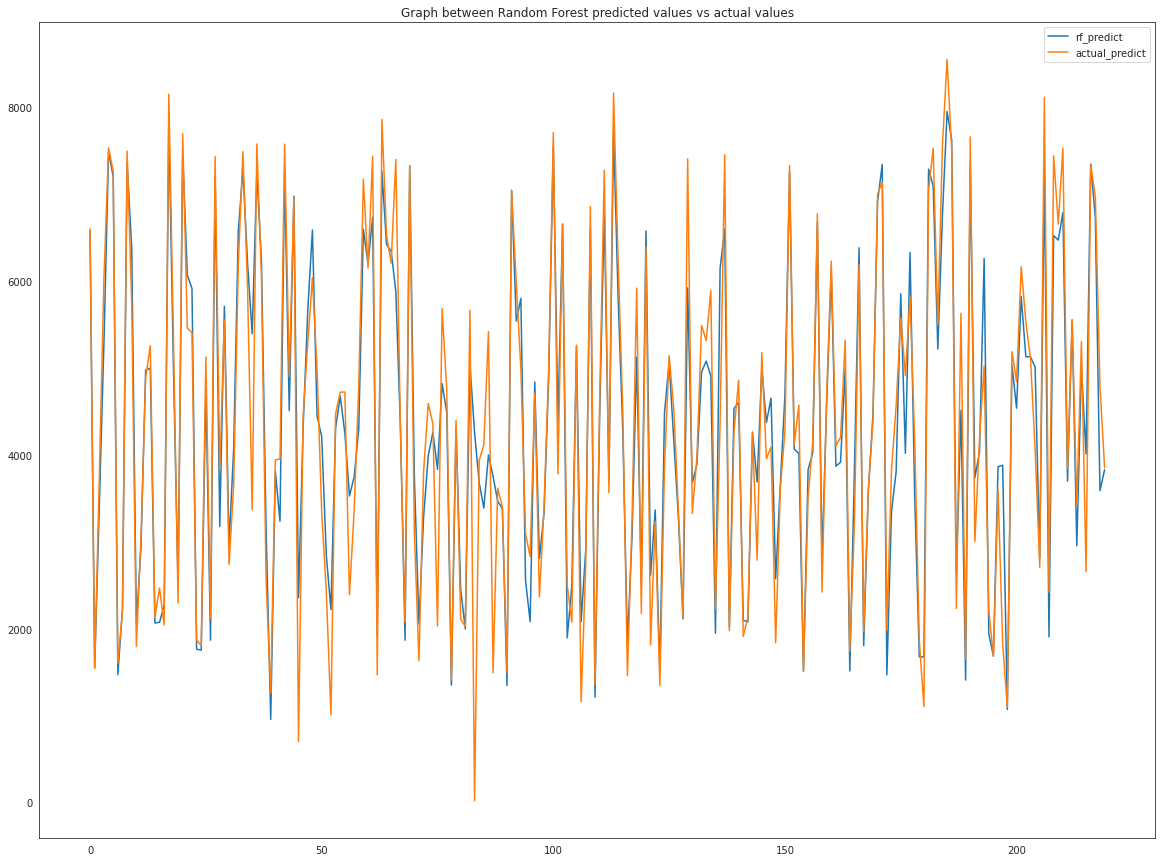

In [71]:
fig,ax=plt.subplots(figsize=(20,15))
ax.set_title('Graph between Random Forest predicted values vs actual values')
ax.plot(rf_pred, label='rf_predict')
ax.plot(y_test, label='actual_predict')
ax.legend()

In [ ]:
#Root mean square error
rmse = math.sqrt(metrics.mean_squared_error(y_test,rf_pred))
print('Root mean square error :',rmse)
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,rf_pred)
print('Mean absolute error :',mae)

Root mean square error : 645.4442256673095
Mean absolute error : 427.02640909090906


In [ ]:
Bike_df1=pd.DataFrame(y_test,columns=['y_test'])
Bike_df2=pd.DataFrame(rf_pred,columns=['rf_pred'])
Bike_predictions=pd.merge(Bike_df1,Bike_df2,left_index=True,right_index=True)
#Bike_predictions.to_csv('Bike_Renting_Python.csv')
Bike_predictions

,y_test,rf_pred
0,6606,6603.245
1,1550,1558.620
2,3747,3376.910
3,6041,5040.040
4,7538,7463.520
5,7264,7242.595
6,1605,1465.890
7,2209,2327.335
8,7499,7302.655
9,5743,6395.605


In [ ]:
X_test.head()

,month,weekday,humidity,temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0,year_1
0,12,2,0.733750,0.475833,0.174129,0,0,0,1,1,0,0,1,1,0,0,0,1
1,2,4,0.437826,0.186957,0.277752,1,0,0,0,1,0,0,1,1,0,0,1,0
2,10,5,0.585833,0.330833,0.229479,0,0,0,1,1,0,0,1,0,1,0,1,0
3,4,0,0.676250,0.425833,0.172267,0,1,0,0,1,0,1,0,0,1,0,0,1
4,9,2,0.570000,0.550000,0.236321,0,0,0,1,1,0,0,1,1,0,0,0,1


In [ ]:
import joblib

In [ ]:
joblib.dump(rf, "./random_forest.joblib")

['./random_forest.joblib']

In [ ]:
loaded_rf = joblib.load("./random_forest.joblib")

In [ ]:
loaded_rf.predict([[12,2,0.733750,0.475833,0.174129,0,0,0,1,1,0,0,1,1,0,0,0,1]])

array([6603.245])